# Learn Algorithmic Trading
Sebastien Donadio & Sourav Ghosh, Packt, 2019
___


## 1 Algorithmic Trading Fundamentals

### Basic concepts regarding the modern trading setup

#### Market sectors
The most popular market sectors are:
- commodities (metals, agricultural produce)
- energy (oil, gas)
- equities (stocks of different companies)
- interest rate bonds (coupons you get in exchange for debt, which accrues interest, hence the name)
- foreign exchange (cash exchange rates between currencies for different countries)

#### Asset classes
different kinds of actual vehicles
that are available for trading at different exchanges:
- cash interest rate bonds
- cash foreign exchange
- cash stock shares
- derivatives: futures and options

### Understanding algorithmic trading concepts

#### Exchange order book
...maintains all incoming buy and sell orders placed
by clients. It tracks all attributes for incoming
orders—prices, number of contracts/shares, order types, and participant
identification. Buy orders (or bids) are sorted from the highest price
(best price) to the lowest price (worst price). Sell orders (or asks) are
sorted from the lowest price (best price) to the highest price (worst price).
Note that matching prioritization method in both cases depends on the matching
algorithm.

#### Limit order book
A limit order book is built by the market participants based on the market data that is being sent out by the exchange in response to market participants sending orders to it.
The purpose is to collect and arrange bids and offers in a meaningful way to gain insight into the market participants present at any particular time, as well as gain insight regarding what the equilibrium prices are.

#### Exchange market data protocols
Are outgoing communication streams from the exchange to all market participants that are well- documented for new participants to build their software applications to subscribe, receive, decode, and check for errors and network losses.

#### Market data feed handlers
software applications that market participants build with a view to interfacing with the specific exchange market data protocol. These are able to subscribe, receive, decode, and check for errors and network losses, and are designed with latency, throughput, error tolerance, redundancy, and many other requirements in mind.

#### Order types

##### IOC – Immediate Or Cancel
These orders never get added to the book. They either match against existing resting orders to a maximum of the IOC order size, or the rest of the incoming order gets canceled. If no resting order is available at a price that the IOC can match against, then the IOC is canceled in its entirety.
##### GTD – Good Till Day
These orders get added to the book. If they match fully against existing resting orders in the book, then they don't get added, otherwise the remaining quantity on the order (which can be the entire original quantity if there's no partial match) gets added to the book and sits as resting orders that the incoming aggressors can match against. The benefits of GTD orders are that they can take advantage of FIFO matching algorithms by having better priorities than orders that just showed up in the book, but require more complex order management in trading algorithms.
##### Stop orders
Stop orders are orders that aren't in the book until a specific price (called the stop price) is traded in the market, at which point they become regular GTD orders at a pre-specified price. These orders are great as exit orders (either to liquidate a losing position or to realize profit on a winning position).

#### Exchange order entry protocols
Exchange order entry protocols are how market participant software applications send order requests (new, cancels, modifies) and how the exchange replies to these requests.

#### Order entry gateway
Order entry gateways are the market participant client applications that communicate with the exchange matching engine over the order entry protocols. These have to deal with order flow in a reliable manner, sending orders to the exchange, modifying and canceling those orders, and getting notifications when these orders are accepted, canceled, executed, and so on.
Oftentimes, market participants run a second variant of order entry gateways that simply receive order-executed notifications to check consistency against the primary order entry gateway order flow. These are called drop-copy gateways.

#### Positions and profit and loss (PnL) management
Orders that get executed cause market participants to have positions in the instrument that they got executed, for the amount the order executed, and at the price of the execution.
A buy side execution is called having a long position, while a sell side execution is called having a short position. When we have no position at all, this is referred to as being flat.
Multiple buy executions, or multiple sell executions for different amounts and prices, cause the overall position price to be the volume weighted average of the execution prices and quantities.
This is called the Volume Weighted Average Price (VWAP) of the position.
Open positions are marked to market to get a sense of what the unrealized Profit and Loss (PnL) of the position is. This means that current market prices are compared to the price of the position; a long position where market prices have gone up is considered unrealized profit, and the opposite is considered unrealized loss.

#### Components of an algorithmic trading system
In practice, a complete algorithmic trading setup is divided into two sections:
- Core infrastructure deals with exchange-facing market data protocol integration, market data feed handlers, internal market data format normalization, historical data recording, instrument definition recording and dissemination, exchange order entry protocols, exchange order entry gateways, core side risk systems, broker-facing applications, back office reconciliation applications, addressing compliance requirements, and others;
- Algorithmic trading strategy components deal with using normalized market data, building order books, generating signals from incoming market data and order flow information, the aggregation of different signals, efficient execution logic built on top of statistical predictive abilities (alpha), position and PnL management inside the strategies, risk management inside the strategies, backtesting, and historical signal and trading research platforms;

##### Market data subscription
These components are responsible for interacting with the feed handler components that publish normalized data. This data can be delivered over a network or locally using a variety of Inter-Process Communication (IPC) mechanisms from the feed handlers. We do not go into great detail about this here. Low latency delivery and scalability are the major driving design decisions in this regard.
##### Limit order books
Once the trading strategy gets normalized market data, it uses that data to build and maintain limit order books for each instrument. Depending on the sophistication and complexity of the limit order books, it can be simple enough such that it tells us how many participants there are on each side, or sophisticated enough to track market participant order priorities as well as track our own orders in the limit order book.
##### Signals
Once limit order books are built, every time they are updated due to new incoming market data information, we build signals using the new information.
A trading signal is a well-defined piece of intelligence that is derived from incoming market data information, limit order books or trade information that allows a trading strategy to get a statistical edge (advantage) vis-à-vis other market participants and, thus, increased profitability.
##### Signal aggregators
Often, a lot of algorithmic trading systems combine a lot of different kinds of signals in order to gain a bigger edge than individual signals provide. The approach is to essentially combine different signals that have different predictive abilities/advantages under different market conditions.
##### Execution logic
Another key component of algorithmic trading is quickly and efficiently managing orders based on signals in order to gain an edge over the competition. It is important to react to changing market data, changing signal values in a fast but intelligent manner. Oftentimes, speed and sophistication are two competing goals, and good execution logic will try to balance the two objectives in an optimal manner. It is also extremely important to disguise our intentions/intelligence from other market participants so that we get the best executions possible.
Remember that other market competitors can observe what orders are sent to the exchange and assess the potential impact it might have, so this component needs to be intelligent enough to not make it obvious what our trading strategy is doing. Slippage and fees are also very important factors as far as execution logic design is concerned.
##### Position and PnL management
All algorithmic trading strategies need to track and manage their positions and PnLs effectively. Depending on the actual trading strategy, this can often range in complexity.
##### Risk management
Bad risk management practices can turn potential profitable strategies into non-profitable ones. There is an even bigger risk of violating rules and regulations at trading exchanges that can often lead to legal actions and huge penalties. Finally, one of the biggest risks with high- speed automated algorithmic trading is that poorly programmed computer software is prone to bugs and errors.
Hence, risk management systems need to be built to be extremely robust, feature rich, and have multiple layers of redundancy. There also needs to be a very high level of testing, stress testing, and strict change management to minimize the possibility of risk systems failing.
##### Backtesting
When researching an automated trading strategy for expected behavior, a key component in a good algorithmic trading research system is a good backtester. A backtester is used to simulate automated trading strategy behavior and retrieve statistics on expected PnLs, expected risk exposure, and other metrics based on historically recorded market data. The basic idea is to answer the question: given historical data, what kind of performance would a specific trading strategy have? This is built by recording historical market data accurately, having a framework to replay it, having a framework that can accept simulated order flow from potential trading strategies, and mimicking how a trading exchange would match this strategy's order flow in the presence of other market participants as specified in the historical market data. It is also a good place to try out different trading strategies to see what ideas work before deploying them to market.
Building and maintaining a highly accurate backtester is one of the most complicated tasks involved in setting up an algorithmic trading research system. It has to accurately simulate things such as software latencies, network latencies, accurate FIFO priorities for orders, slippage, fees, and, in some cases, also the market impact caused by the order flow for the strategy under consideration (that is, how the other market participants may react in the presence of this strategy's order flow and trading activity).

#### getting the data

### Functions

In [171]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
from datetime import datetime
from pandas import DataFrame

DATA_FOLDER='../data'
DEFAULT_START_DATE = '2000-01-01'
DEFAULT_END_DATE = datetime.now().strftime("%Y-%m-%d")
STOCK_TICK_SOURCE = 'yahoo'

def get_ticker_df(tick: str, start_dt: str=DEFAULT_START_DATE, end_dt: str=DEFAULT_END_DATE) -> pd.DataFrame:

    ticker_file = f"{DATA_FOLDER}/{tick}.pkl"
    if os.path.isfile(ticker_file):
        result = pd.read_pickle(ticker_file)
    else:
        result = data.DataReader(tick, STOCK_TICK_SOURCE, DEFAULT_START_DATE, DEFAULT_END_DATE)
        result.to_pickle(ticker_file)

    return result.loc[start_dt: end_dt]


def massage_dataframe(ticker_df: DataFrame):
    return ticker_df.rename(columns={'Adj Close':'price'}).rename(columns={'Volume':'volume'})

def create_signal_simplest_trend(df):

    result = pd.DataFrame(index=df.index)
    result['price'] = df['price']
    result['daily_diff'] = result['price'].diff()
    result['price_direction'] = 0.0
    result['price_direction'] = np.where(result['daily_diff'] >= 0, 1.0, 0.0)
    result['signal'] = result['price_direction'].diff()

    return result

def create_signal_position(df, initial_capital, signal_column = "signal", operation_cost=1.0):

    positions = pd.DataFrame(index=df.index).fillna(0.0)
    portfolio = pd.DataFrame(index=df.index).fillna(0.0)

    positions['signal'] = df[signal_column]
    positions['operation_cost'] = np.where(df[signal_column] > 0, operation_cost, 0.0)

    portfolio['trx'] = (positions['signal'].multiply(df['price'], axis=0) + positions['operation_cost'] )
    portfolio['exposure'] = positions['signal'].cumsum()
    portfolio['position'] = portfolio['exposure'].multiply(df['price'], axis=0)
    portfolio['cash'] = initial_capital - (portfolio['trx']).cumsum()
    portfolio['total'] = portfolio['position'] + portfolio['cash']
    return portfolio

def plot_position(position):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    position['position'].plot(ax=ax1, color='y', lw=2., ylabel='position', legend=True)
    position['cash'].plot(ax=ax1, color='b', lw=2., ylabel='cash', legend=True)
    position['total'].plot(ax=ax1, color='g', lw=2., ylabel='total', legend=True)

def signal_analysis(ticker, start, signal_producer, operation_cost=0.0, initial_capital=1000.0):
    d = massage_dataframe(get_ticker_df(ticker, start))
    position = create_signal_position(signal_producer(d), initial_capital, operation_cost=operation_cost)
    #print(position.head(16))
    #print(position.tail(16))
    plot_position(position)


### simple signals

In [152]:
#signal_analysis('GOOG','2018-01-01', create_signal_simplest_trend)
#signal_analysis('AMZN','2018-01-01', create_signal_simplest_trend)
#signal_analysis('TSLA','2018-01-01', create_signal_simplest_trend)
#signal_analysis('PBW','2018-01-01', create_signal_simplest_trend)
#signal_analysis('QCLN','2018-01-01', create_signal_simplest_trend)

In [172]:
def signal_support_resistance(df, bin_width:int=20, tolerance:float=0.2, signal_count_trigger:int=2):

    df['sup_tolerance'] = 0.0
    df['res_tolerance'] = 0.0
    df['sup_count'] = 0
    df['res_count'] = 0
    df['sup'] = 0.0
    df['res'] = 0.0
    df['positions'] = 0
    df['signal'] = 0
    in_support=0
    in_resistance=0

    for x in range(bin_width-1, len(df)):
        df_section = df[x + 1 - bin_width:x + 1]
        support_level=min(df_section['price'])
        resistance_level=max(df_section['price'])
        range_level = resistance_level - support_level
        df['res'][x] = resistance_level
        df['sup'][x] = support_level
        df['sup_tolerance'][x]=support_level + tolerance * range_level
        df['res_tolerance'][x]=resistance_level - tolerance * range_level
        if df['price'][x] >= df['res_tolerance'][x] and df['price'][x] <= df['res'][x]:
            in_resistance += 1
            df['res_count'][x]=in_resistance
        elif df['price'][x] <= df['sup_tolerance'][x] and df['price'][x] >= df['sup'][x]:
            in_support += 1
            df['sup_count'][x] = in_support
        else:
            in_support=0
            in_resistance=0
        if in_resistance > signal_count_trigger:
            df['signal'][x]=1
        elif in_support > signal_count_trigger:
            df['signal'][x]=0
        else:
            df['signal'][x] = df['signal'][x-1]

    return df

def create_signal_position(df, initial_capital, signal_column = "signal", operation_cost=1.0):

    positions = pd.DataFrame(index=df.index).fillna(0.0)
    portfolio = pd.DataFrame(index=df.index).fillna(0.0)

    positions['signal'] = df[signal_column]
    positions['operation_cost'] = np.where(df[signal_column] > 0, operation_cost, 0.0)

    portfolio['trx'] = (positions['signal'].multiply(df['price'], axis=0) + positions['operation_cost'] )
    portfolio['exposure'] = positions['signal'].cumsum()
    portfolio['position'] = portfolio['exposure'].multiply(df['price'], axis=0)
    portfolio['cash'] = initial_capital - (portfolio['trx']).cumsum()
    portfolio['total'] = portfolio['position'] + portfolio['cash']
    return portfolio

def plot_position(df, y_label:str="", support_col:str=None, resistance_col:str=None):
    fig = plt.figure(figsize=[25.6,19.2])
    ax1 = fig.add_subplot(311, ylabel=f'{y_label} price in $')
    if support_col is not None:
        df[support_col].plot(ax=ax1, color='g', lw=2.)
    if resistance_col is not None:
        df[resistance_col].plot(ax=ax1, color='b', lw=2.)
    df['price'].plot(ax=ax1, color='r', lw=2.)
    ax1.plot(df.loc[df.move == 1.0].index, df.price[df.move == 1.0], '^', markersize=7, color='k',label='buy')
    ax1.plot(df.loc[df.move == -1.0].index, df.price[df.move == -1.0], 'v', markersize=7, color='k',label='sell')
    plt.legend()
    ax2 = fig.add_subplot(312, ylabel='portfolio in $')
    df['position'].plot(ax=ax2, color='b', lw=2.)
    df['cash'].plot(ax=ax2, color='g', lw=2.)
    df['total'].plot(ax=ax2, color='r', lw=2.)
    plt.legend()
    ax3 = fig.add_subplot(313, ylabel='volume')
    df['volume'].plot(ax=ax3, color='b', lw=2.)
    plt.legend()
    plt.show()



def unfold_signal(df, initial_capital=1000.0, operation_cost=1.0):

    df['move'] = df['signal'].diff()
    df['operation_cost'] = np.where(df['move'] != 0, operation_cost, 0.0)
    df['trx'] = np.where(df['move'] == 0, 0.0, df['move'].multiply(df['price'], axis=0) + df['operation_cost'] )
    df['exposure'] = df['move'].cumsum()
    df['position'] = df['exposure'].multiply(df['price'], axis=0)
    df['cash'] = initial_capital - (df['trx']).cumsum()
    df['total'] = df['position'] + df['cash']

    return df

/Users/jotvi/Documents/code/nihao/.env/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jotvi/Documents/code/nihao/.env/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jotvi/Documents/code/nihao/.env/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jotvi/Documents/code/

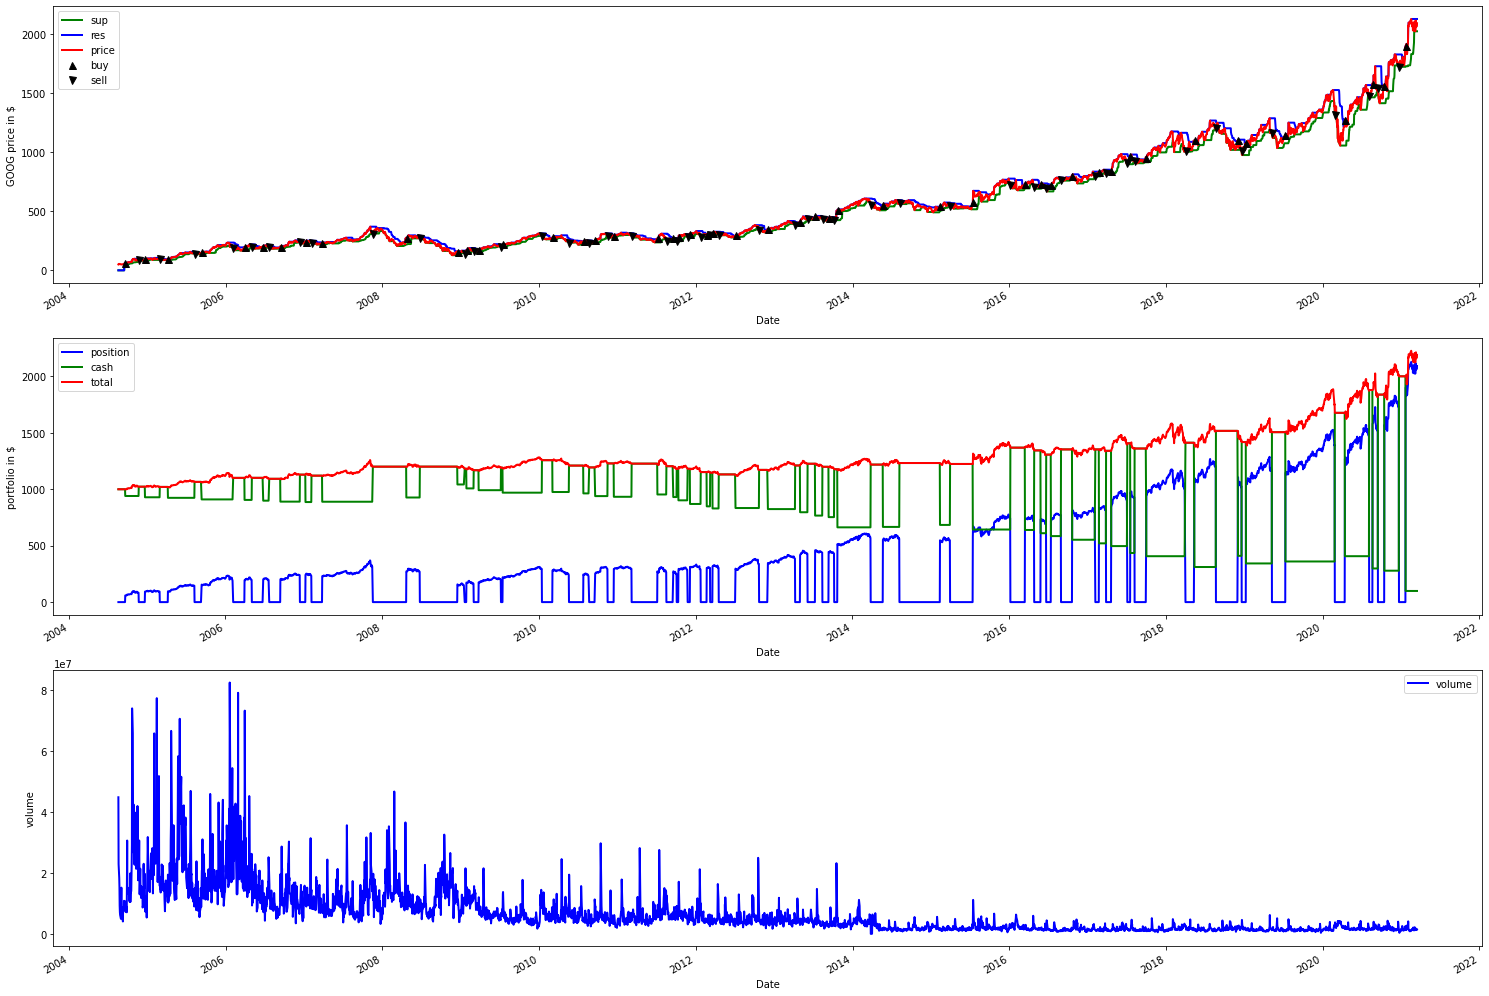

In [173]:
ticker = 'GOOG'
df_ticker = massage_dataframe(get_ticker_df(ticker))
df_support_resistance = signal_support_resistance(df_ticker, signal_count_trigger=3)
df_support_resistance = unfold_signal(df_support_resistance)

plot_position(df_support_resistance, y_label=ticker, support_col='sup', resistance_col='res')




In [185]:
s = data.get_nasdaq_symbols()

In [187]:
nasdaq_symbols = s[(s['Listing Exchange']=='N') & (~s['Financial Status'].isin(['D', 'E', 'Q', 'G', 'H', 'J', 'K'])) & (s['Test Issue']==False) ]

In [188]:
nasdaq_symbols

,Nasdaq Traded,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Symbol,,,,,,,,,,,
A,True,"Agilent Technologies, Inc. Common Stock",N,,False,100.0,False,NaN,A,A,False
AA,True,Alcoa Corporation Common Stock,N,,False,100.0,False,NaN,AA,AA,False
AAC.U,True,"Ares Acquisition Corporation Units, each consi...",N,,False,100.0,False,NaN,AAC.U,AAC=,False
AAIC,True,Arlington Asset Investment Corp Class A (new),N,,False,100.0,False,NaN,AAIC,AAIC,False
AAIC$B,True,Arlington Asset Investment Corp 7.00%,N,,False,100.0,False,NaN,AAICpB,AAIC-B,False
...,...,...,...,...,...,...,...,...,...,...,...
ZTO,True,ZTO Express (Cayman) Inc. American Depositary ...,N,,False,100.0,False,NaN,ZTO,ZTO,False
ZTR,True,Virtus Total Return Fund Inc.,N,,False,100.0,False,NaN,ZTR,ZTR,False
ZTS,True,Zoetis Inc. Class A Common Stock,N,,False,100.0,False,NaN,ZTS,ZTS,False


In [209]:
v = df_support_resistance.tail()
lastdate = v.tail(1).index[0].to_pydatetime().date()
v.loc[:lastdate]


,High,Low,Open,Close,volume,price,sup_tolerance,res_tolerance,sup_count,res_count,...,res,positions,signal,move,operation_cost,trx,exposure,position,cash,total
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-10,2075.000000,2033.369995,2071.760010,2055.030029,1267800.0,2055.030029,2044.998047,2107.482056,0,0,...,2128.310059,0,1,0.0,0.0,0.0,1.0,2055.030029,98.833202,2153.863232
2021-03-11,2125.699951,2072.379883,2074.060059,2114.770020,1238300.0,2114.770020,2044.998047,2107.482056,0,1,...,2128.310059,0,1,0.0,0.0,0.0,1.0,2114.770020,98.833202,2213.603222
2021-03-12,2090.260010,2047.550049,2085.000000,2061.919922,1725000.0,2061.919922,2044.998047,2107.482056,0,0,...,2128.310059,0,1,0.0,0.0,0.0,1.0,2061.919922,98.833202,2160.753124
2021-03-15,2067.060059,2043.510010,2062.300049,2066.489990,1298100.0,2066.489990,2044.998047,2107.482056,0,0,...,2128.310059,0,1,0.0,0.0,0.0,1.0,2066.489990,98.833202,2165.323193
